In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16456898147706406409
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3044750131
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7430212267479512516
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [2]:
print(tf.__version__)

2.4.1


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
import pickle
X=pickle.load(open('X.pickle','rb'))

y=pickle.load(open('y.pickle','rb'))

In [5]:
print(X.shape)
print(y.shape)

(2822, 224, 224, 3)
(2822,)


In [6]:
from collections import Counter
y_dist = Counter(y)
print (y_dist)

Counter({0: 1576, 1: 787, 2: 459})


In [7]:
label = list(map(str,y))
#label[0] 

for i in range(len(label)):
    if label[i]=='0':
        label[i]='NORMAL'
    if label[i]=='1':
        label[i]='PNEUMONIA'
    if label[i]=='2':
       label[i]='COVID-19' 
        
#label        

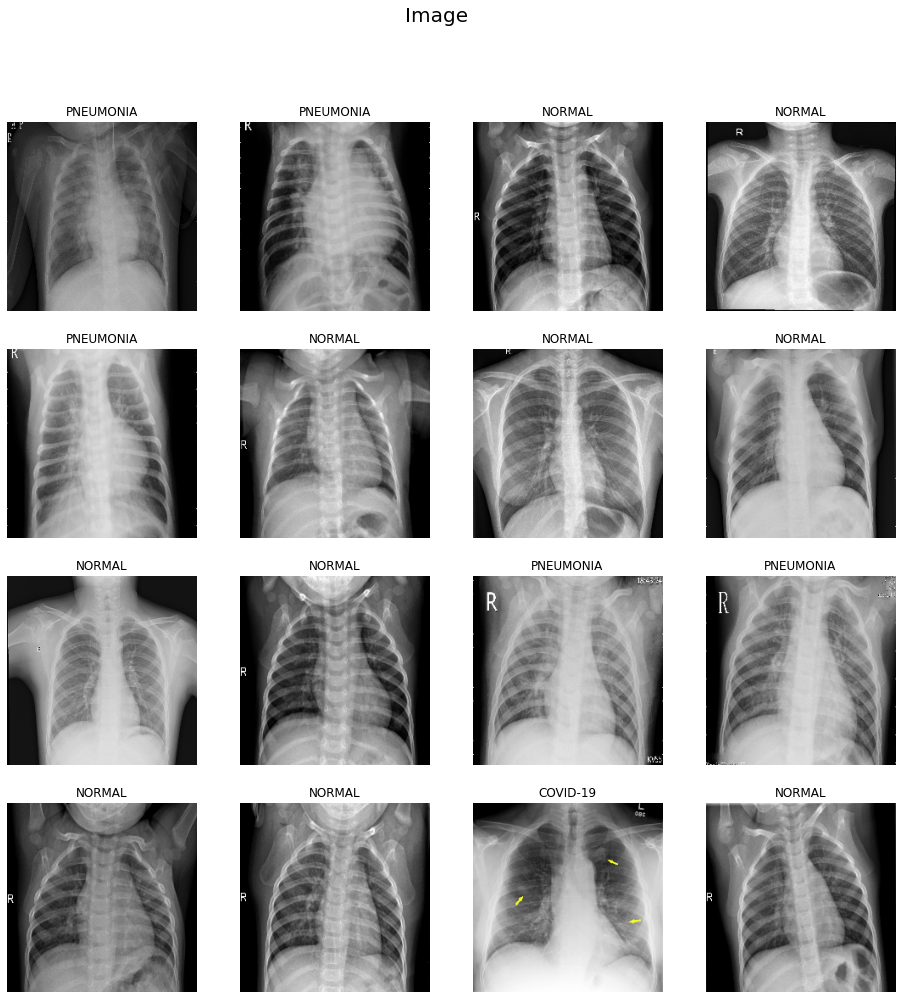

In [8]:
import matplotlib.pyplot as plt
import random

#plt.figure(figsize=(16,6))
fig, m_axs = plt.subplots(4, 4, figsize = (16, 16))
for n in range(16):
    plt.subplot(4,4,n+1)
    plt.imshow(X[n])
    plt.title(label[n])
    plt.axis('off')
    plt.suptitle("Image",size=20)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [10]:
from collections import Counter
y_dist_train = Counter(y_train)
y_dist_test = Counter(y_test)

print(y_train.shape)
print(y_test.shape)
print (y_dist_train)
print(y_dist_test)

(2257,)
(565,)
Counter({0: 1261, 1: 629, 2: 367})
Counter({0: 315, 1: 158, 2: 92})


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1,stratify=y_train, random_state=42)

In [12]:
from collections import Counter
y_dist_train = Counter(y_train)
y_dist_val = Counter(y_val)

print(y_train.shape)
print(y_val.shape)
print (y_dist_train)
print(y_dist_val)

(2031,)
(226,)
Counter({0: 1135, 1: 566, 2: 330})
Counter({0: 126, 1: 63, 2: 37})


In [13]:
from tensorflow.keras.utils import to_categorical
y_new_train = to_categorical(y_train, 3)
y_new_test = to_categorical(y_test, 3)
y_new_val=to_categorical(y_val, 3)

In [14]:
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization,MaxPool2D
import matplotlib.pyplot as plt
%matplotlib inline

# Customize

In [45]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [46]:
nets = 5
j=2
model_c= [j]*nets
model_c= Sequential()

model_c = Sequential()
model_c.add(Conv2D(32,kernel_size=5,activation='relu',input_shape=(224,224,3)))
model_c.add(MaxPooling2D(pool_size = (2, 2)))
model_c.add(Dropout(0.4))
model_c.add(Conv2D(64,kernel_size=5,activation='relu'))
model_c.add(MaxPooling2D(pool_size = (2, 2)))
model_c.add(Dropout(0.4))
model_c.add(Conv2D(128,kernel_size=5,activation='relu'))
model_c.add(MaxPooling2D(pool_size = (2, 2)))
model_c.add(Dropout(0.4))
model_c.add(Flatten())
model_c.add(Dense(128, activation='relu'))
model_c.add(Dropout(0.4))
model_c.add(Dense(3, activation='softmax'))
model_c.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
   

In [47]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)


In [49]:
BS=16
history = model_c.fit_generator(
    datagen.flow(X_train, y_new_train, batch_size=BS),
    steps_per_epoch=len(X_train)//BS,
    validation_data=(X_val, y_new_val),
    validation_steps=len(X_val) // BS,
    epochs=100, 
    verbose=1,
    callbacks=early_stop)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
126/126 [==============================] - ETA: 0s - loss: 1.5005 - accuracy: 0.5188WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001F9C12081F8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

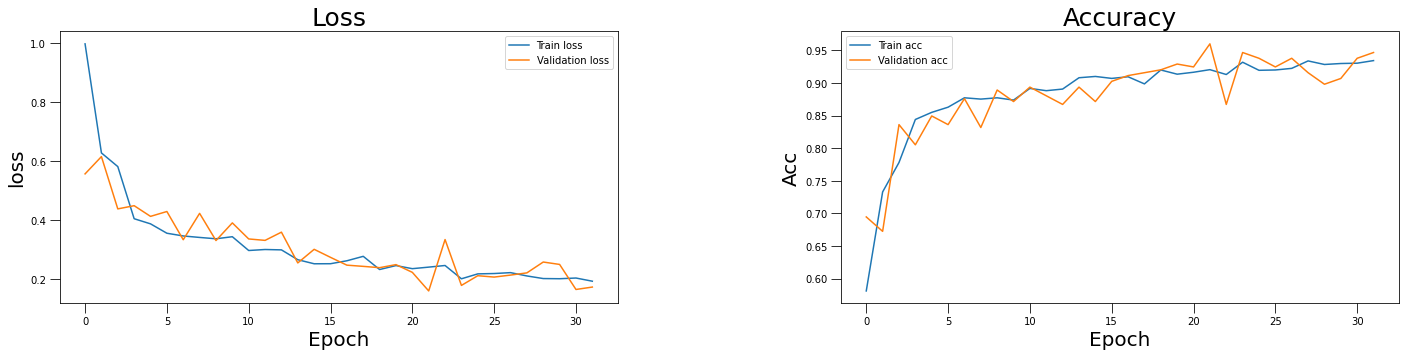

In [50]:
plt.figure(figsize=(24,12))

#plt.suptitle("Confusion Matrixes",fontsize=24,color='white')
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Loss",size=25)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Validation loss")
plt.gcf().axes[0].tick_params(size=10)
plt.xlabel('Epoch',size=20)
plt.ylabel('loss',size=20)
plt.legend()


plt.subplot(2,2,2)
plt.title("Accuracy",size=25)
plt.plot(history.epoch, history.history["accuracy"], label="Train acc")
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
plt.gcf().axes[1].tick_params(size=10)
plt.xlabel('Epoch',size=20)
plt.ylabel('Acc',size=20)
plt.legend()



In [51]:
import numpy as np
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']
result_3class=np.array(result_3class)
from sklearn.metrics import classification_report
prediction = model_c.predict(X_test)
prediction=np.argmax(prediction,axis=1)
print(classification_report(y_test, prediction,target_names=result_3class))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

      NORMAL       0.96      0.96      0.96       315
   PNEUMONIA       0.90      0.91      0.90       158
    COVID-19       0.96      0.96      0.96        92

    accuracy                           0.94       565
   macro avg       0.94      0.94      0.94       565
weighted avg       0.94      0.94      0.94       56

In [52]:
from sklearn.metrics import confusion_matrix
cm_c=confusion_matrix(y_test, prediction)

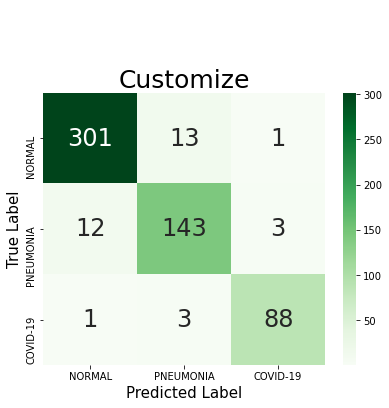

In [53]:
import seaborn as sns
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24,color='white')
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("Customize",size=25)
plt.gcf().axes[0].tick_params()
ax=sns.heatmap(cm_c,annot=True,cmap="Greens",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)
plt.show()

NORMAL AUC = 0.9811
PNEUMONIA AUC = 0.9777
COVID-19 AUC = 0.9968
{0: 0.9811428571428571, 1: 0.9777470220508195, 2: 0.9967827925360787}


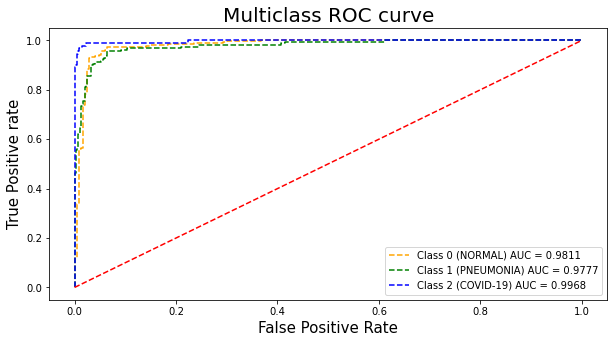

In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

result_3class=['NORMAL','PNEUMONIA', 'COVID-19']

pred_prob = model_c.predict(X_test)


# roc curve for classes
fpr = {}
tpr = {}
roc_auc  = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("{0} AUC = {1:.4f}".format(result_3class[i],roc_auc[i]))


# plotting  
plt.figure(figsize=(10,5))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 (NORMAL) AUC = {0:.4f}'.format(roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 (PNEUMONIA) AUC = {0:.4f}'.format(roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 (COVID-19) AUC = {0:.4f}'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1], color='Red', linestyle='--')
plt.title('Multiclass ROC curve',size=20)
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive rate',size=15)
plt.gcf().axes[0].tick_params()
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
print(roc_auc)


COVID-19 AUC =  0.9968


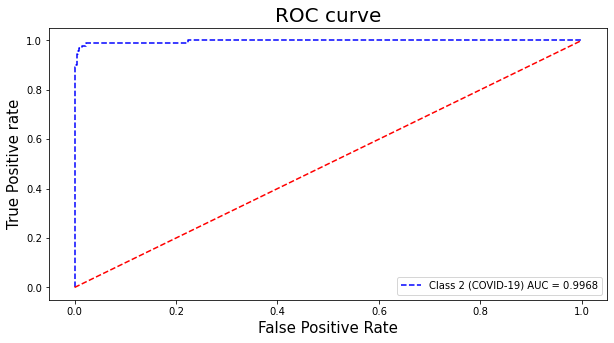

In [55]:
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']

pred_prob = model_c.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
roc_auc  = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    


# plotting 
print("COVID-19 AUC = ",'%.4f'%roc_auc[2])
plt.figure(figsize=(10,5))

plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 (COVID-19) AUC = {0:.4f}'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1], color='Red', linestyle='--')
plt.title('ROC curve',size=20)
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive rate',size=15)
plt.gcf().axes[0].tick_params()
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


# Vgg16

In [56]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [57]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

In [58]:
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
# place the head FC model on top of the base model (this will become
# the actual model we will train)
model_v = Model(inputs=baseModel.input, outputs=headModel)
# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

In [59]:
from tensorflow.keras.optimizers import Adam
INIT_LR = 1e-3
EPOCHS = 100
BS = 16

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)


model_v.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [60]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [97]:
history = model_v.fit_generator(
    trainAug.flow(X_train, y_new_train, batch_size=BS),
    steps_per_epoch=len(X_train)//BS,
    validation_data=(X_val, y_new_val),
    validation_steps=len(X_val) // BS,
    epochs=100, 
    verbose=1,
    callbacks=early_stop)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
126/126 [==============================] - ETA: 0s - loss: 1.0224 - accuracy: 0.5306WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001FB9BCF3678> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

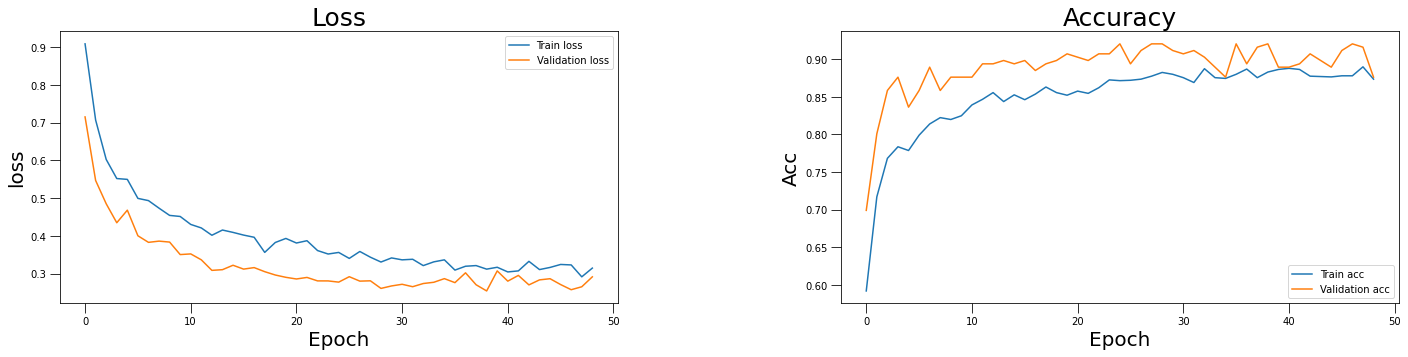

In [98]:
plt.figure(figsize=(24,12))

#plt.suptitle("Confusion Matrixes",fontsize=24,color='white')
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Loss",size=25)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Validation loss")
plt.gcf().axes[0].tick_params(size=10)
plt.xlabel('Epoch',size=20)
plt.ylabel('loss',size=20)
plt.legend()


plt.subplot(2,2,2)
plt.title("Accuracy",size=25)
plt.plot(history.epoch, history.history["accuracy"], label="Train acc")
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
plt.gcf().axes[1].tick_params(size=10)
plt.xlabel('Epoch',size=20)
plt.ylabel('Acc',size=20)
plt.legend()



In [99]:
import numpy as np
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']
result_3class=np.array(result_3class)
from sklearn.metrics import classification_report
prediction = model_v.predict(X_test)
prediction=np.argmax(prediction,axis=1)
print(classification_report(y_test, prediction,target_names=result_3class))

              precision    recall  f1-score   support

      NORMAL       0.89      0.97      0.93       315
   PNEUMONIA       0.92      0.75      0.83       158
    COVID-19       0.88      0.91      0.89        92

    accuracy                           0.90       565
   macro avg       0.90      0.88      0.88       565
weighted avg       0.90      0.90      0.89       565



In [100]:
from sklearn.metrics import confusion_matrix
cm_v=confusion_matrix(y_test, prediction)

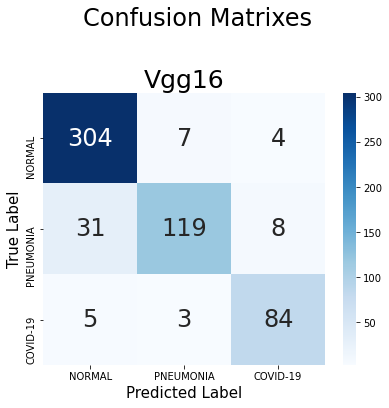

In [101]:
import seaborn as sns
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("Vgg16",size=25)
plt.gcf().axes[0].tick_params()
ax=sns.heatmap(cm_v,annot=True,cmap="Blues",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)
plt.show()

NORMAL AUC = 0.9781
PNEUMONIA AUC = 0.9708
COVID-19 AUC = 0.9945
{0: 0.978120634920635, 1: 0.9707803315398252, 2: 0.9945307473113337}


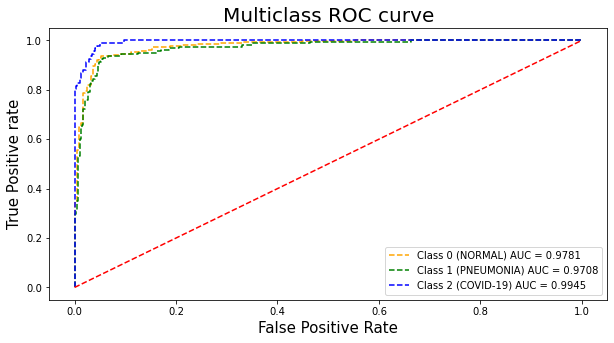

In [102]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

result_3class=['NORMAL','PNEUMONIA', 'COVID-19']

pred_prob = model_v.predict(X_test)


# roc curve for classes
fpr = {}
tpr = {}
roc_auc  = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("{0} AUC = {1:.4f}".format(result_3class[i],roc_auc[i]))


# plotting  
plt.figure(figsize=(10,5))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 (NORMAL) AUC = {0:.4f}'.format(roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 (PNEUMONIA) AUC = {0:.4f}'.format(roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 (COVID-19) AUC = {0:.4f}'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1], color='Red', linestyle='--')
plt.title('Multiclass ROC curve',size=20)
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive rate',size=15)
plt.gcf().axes[0].tick_params()
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
print(roc_auc)


COVID-19 AUC =  0.9945


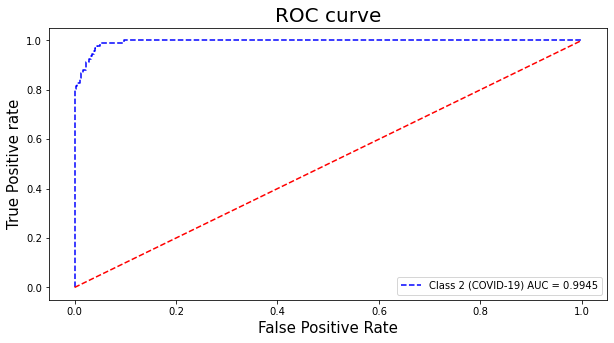

In [103]:
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']

pred_prob = model_v.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
roc_auc  = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    


# plotting 
print("COVID-19 AUC = ",'%.4f'%roc_auc[2])
plt.figure(figsize=(10,5))

plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 (COVID-19) AUC = {0:.4f}'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1], color='Red', linestyle='--')
plt.title('ROC curve',size=20)
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive rate',size=15)
plt.gcf().axes[0].tick_params()
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


# Inceptionv3

In [104]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [105]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainAug = ImageDataGenerator(
    rotation_range=15,
    fill_mode="nearest")

In [106]:
for layer in pre_trained_model.layers:
    layer.trainable = False

In [107]:
from tensorflow .keras.optimizers import RMSprop
x = layers.Flatten()(pre_trained_model.output)
x = layers.BatchNormalization()(x)
x = layers.Dense(3, activation='softmax')(x)


model_i = Model(pre_trained_model.input, x)

model_i.compile(optimizer=RMSprop(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [108]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [109]:
BS=16
history = model_i.fit_generator(
    trainAug.flow(X_train, y_new_train, batch_size=BS),
    steps_per_epoch=len(X_train)//BS,
    validation_data=(X_val, y_new_val),
    validation_steps=len(X_val) // BS,
    epochs=100, 
    verbose=1,
    callbacks=early_stop)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
126/126 [==============================] - ETA: 0s - loss: 0.4734 - accuracy: 0.8207WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001FCDA497C18> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10

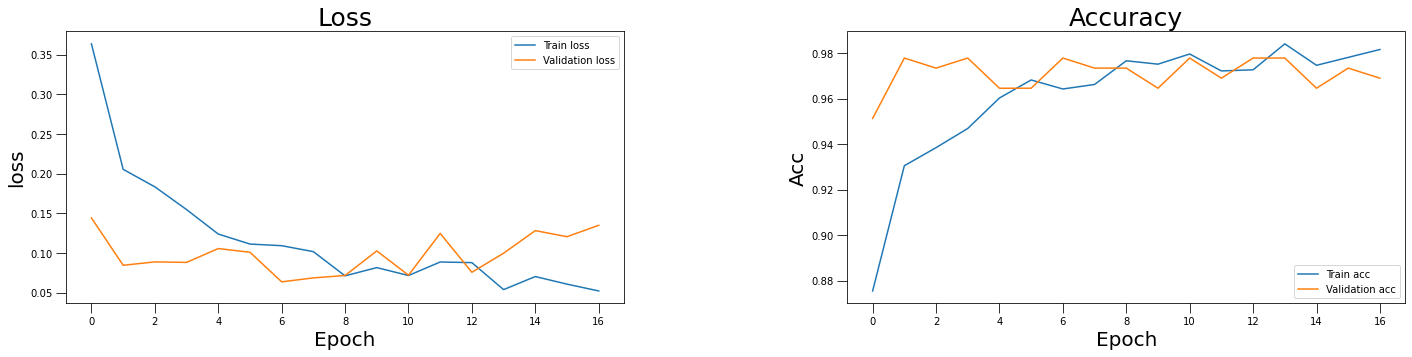

In [110]:
plt.figure(figsize=(24,12))

#plt.suptitle("Confusion Matrixes",fontsize=24,color='white')
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Loss",size=25)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Validation loss")
plt.gcf().axes[0].tick_params(size=10)
plt.xlabel('Epoch',size=20)
plt.ylabel('loss',size=20)
plt.legend()


plt.subplot(2,2,2)
plt.title("Accuracy",size=25)
plt.plot(history.epoch, history.history["accuracy"], label="Train acc")
plt.plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
plt.gcf().axes[1].tick_params(size=10)
plt.xlabel('Epoch',size=20)
plt.ylabel('Acc',size=20)
plt.legend()



In [111]:
import numpy as np
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']
result_3class=np.array(result_3class)
from sklearn.metrics import classification_report
prediction = model_i.predict(X_test)
prediction=np.argmax(prediction,axis=1)
print(classification_report(y_test, prediction,target_names=result_3class))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

      NORMAL       0.95      0.98      0.97       315
   PNEUMONIA       0.95      0.90      0.93       158
    COVID-19       0.98      0.97      0.97        92

    accuracy                           0.96       565
   macro avg       0.96      0.95      0.95       565
weighted avg       0.96      0.96      0.96       56

In [112]:
from sklearn.metrics import confusion_matrix
cm_i=confusion_matrix(y_test, prediction)

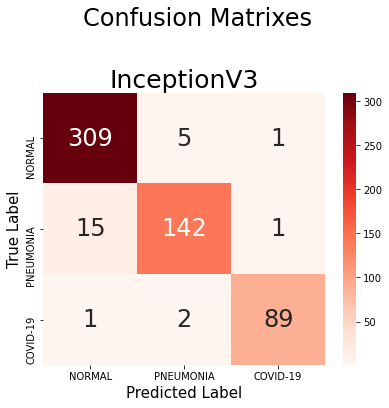

In [113]:
import seaborn as sns
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("InceptionV3",size=25)
plt.gcf().axes[0].tick_params()
ax=sns.heatmap(cm_i,annot=True,cmap="Reds",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)
plt.show()

NORMAL AUC = 0.9895
PNEUMONIA AUC = 0.9854
COVID-19 AUC = 0.9976
{0: 0.9895365079365079, 1: 0.9853979410941436, 2: 0.9975641143487453}


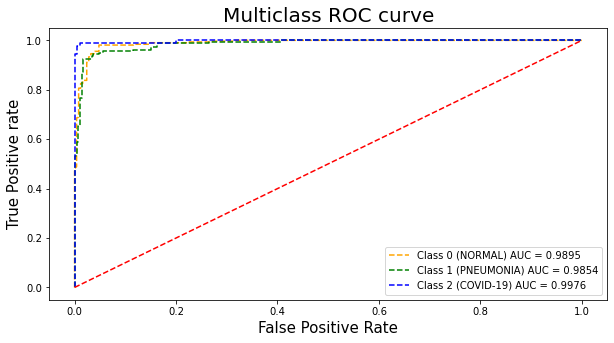

In [114]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

result_3class=['NORMAL','PNEUMONIA', 'COVID-19']
pred = model_i.predict(X_test)
pred_prob = model_i.predict(X_test)


# roc curve for classes
fpr = {}
tpr = {}
roc_auc  = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("{0} AUC = {1:.4f}".format(result_3class[i],roc_auc[i]))


# plotting  
plt.figure(figsize=(10,5))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 (NORMAL) AUC = {0:.4f}'.format(roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 (PNEUMONIA) AUC = {0:.4f}'.format(roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 (COVID-19) AUC = {0:.4f}'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1], color='Red', linestyle='--')
plt.title('Multiclass ROC curve',size=20)
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive rate',size=15)
plt.gcf().axes[0].tick_params()
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
print(roc_auc)


COVID-19 AUC =  0.9976


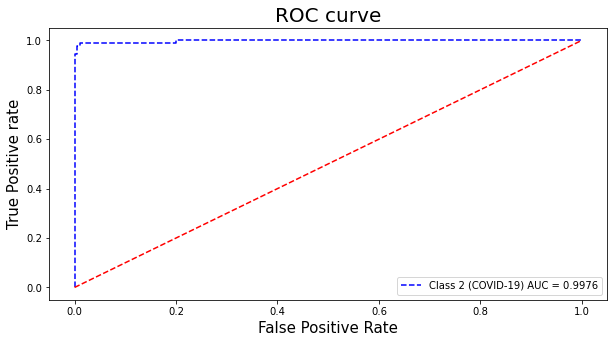

In [115]:
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']

pred_prob = model_i.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
roc_auc  = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    


# plotting 
print("COVID-19 AUC = ",'%.4f'%roc_auc[2])
plt.figure(figsize=(10,5))

plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 (COVID-19) AUC = {0:.4f}'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1], color='Red', linestyle='--')
plt.title('ROC curve',size=20)
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive rate',size=15)
plt.gcf().axes[0].tick_params()
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


# Resnet50

In [116]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainAug = ImageDataGenerator(
    rotation_range=40,
    zoom_range = 0.2,  
    width_shift_range=0.2, 
    height_shift_range=0.2,
    shear_range = 0.2,
    horizontal_flip = True)    

In [117]:
from tensorflow.keras.applications import ResNet50

model_r = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [118]:
for layer in model_r.layers:
    layer.trainable = False

In [119]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

model_r = Sequential()
model_r.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
model_r.add(Dense(3, activation='softmax'))

In [120]:
model_r.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'categorical_crossentropy', metrics = ['acc'])

In [121]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10)

In [122]:
BS=16
history = model_r.fit_generator(
    trainAug.flow(X_train, y_new_train, batch_size=BS),
    steps_per_epoch=len(X_train)//BS,
    validation_data=(X_val, y_new_val),
    validation_steps=len(X_val) // BS,
    epochs=100, 
    verbose=1,
    callbacks=early_stop)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
126/126 [==============================] - ETA: 0s - loss: 2.6096 - acc: 0.6184WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001FBCE76DA68> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) an

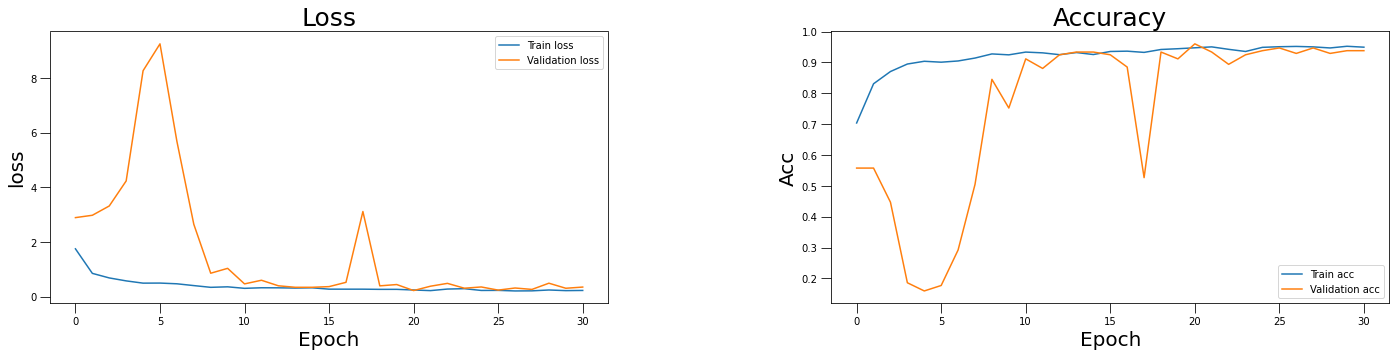

In [123]:
plt.figure(figsize=(24,12))

#plt.suptitle("Confusion Matrixes",fontsize=24,color='white')
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Loss",size=25)
plt.plot(history.epoch, history.history["loss"], label="Train loss")
plt.plot(history.epoch, history.history["val_loss"], label="Validation loss")
plt.gcf().axes[0].tick_params(size=10)
plt.xlabel('Epoch',size=20)
plt.ylabel('loss',size=20)
plt.legend()


plt.subplot(2,2,2)
plt.title("Accuracy",size=25)
plt.plot(history.epoch, history.history["acc"], label="Train acc")
plt.plot(history.epoch, history.history["val_acc"], label="Validation acc")
plt.gcf().axes[1].tick_params(size=10)
plt.xlabel('Epoch',size=20)
plt.ylabel('Acc',size=20)
plt.legend()



In [124]:
import numpy as np
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']
result_3class=np.array(result_3class)
from sklearn.metrics import classification_report
prediction = model_r.predict(X_test)
prediction=np.argmax(prediction,axis=1)
print(classification_report(y_test, prediction,target_names=result_3class))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

      NORMAL       0.93      0.98      0.95       315
   PNEUMONIA       0.95      0.85      0.90       158
    COVID-19       0.99      0.97      0.98        92

    accuracy                           0.94       565
   macro avg       0.95      0.93      0.94       565
weighted avg       0.94      0.94      0.94       56

In [125]:
from sklearn.metrics import confusion_matrix
cm_r=confusion_matrix(y_test, prediction)

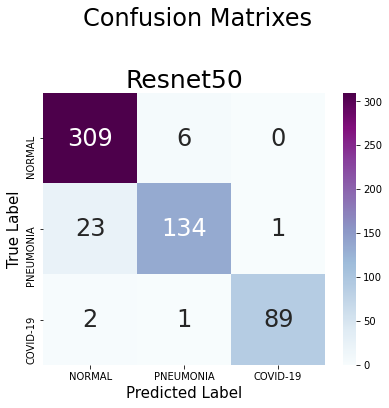

In [126]:
import seaborn as sns
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("Resnet50",size=25)
plt.gcf().axes[0].tick_params()
ax=sns.heatmap(cm_r,annot=True,cmap="BuPu",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)
plt.show()

NORMAL AUC = 0.9913
PNEUMONIA AUC = 0.9837
COVID-19 AUC = 0.9990
{0: 0.9912825396825398, 1: 0.9836640437906261, 2: 0.9989658976008824}


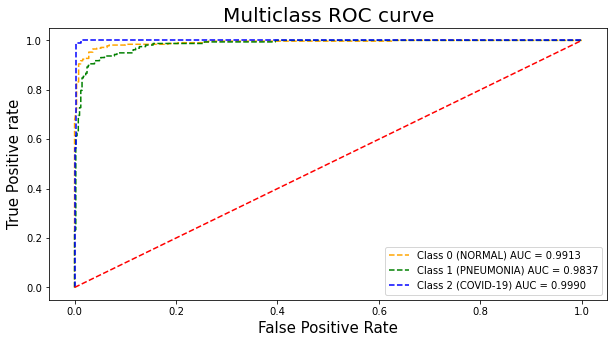

In [127]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

result_3class=['NORMAL','PNEUMONIA', 'COVID-19']

pred_prob = model_r.predict(X_test)


# roc curve for classes
fpr = {}
tpr = {}
roc_auc  = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    print("{0} AUC = {1:.4f}".format(result_3class[i],roc_auc[i]))


# plotting  
plt.figure(figsize=(10,5))
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 (NORMAL) AUC = {0:.4f}'.format(roc_auc[0]))
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 (PNEUMONIA) AUC = {0:.4f}'.format(roc_auc[1]))
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 (COVID-19) AUC = {0:.4f}'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1], color='Red', linestyle='--')
plt.title('Multiclass ROC curve',size=20)
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive rate',size=15)
plt.gcf().axes[0].tick_params()
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)
print(roc_auc)


COVID-19 AUC =  0.9990


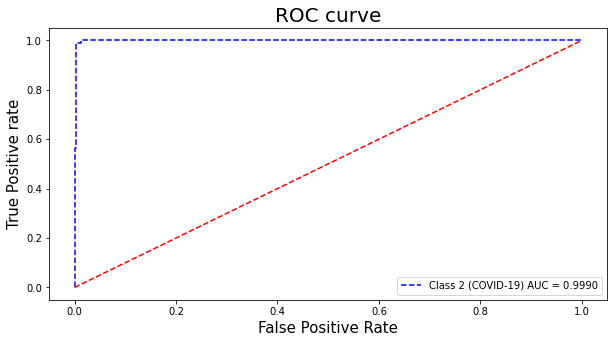

In [128]:
result_3class=['NORMAL','PNEUMONIA', 'COVID-19']

pred_prob = model_r.predict(X_test)

# roc curve for classes
fpr = {}
tpr = {}
roc_auc  = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
    


# plotting 
print("COVID-19 AUC = ",'%.4f'%roc_auc[2])
plt.figure(figsize=(10,5))

plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 (COVID-19) AUC = {0:.4f}'.format(roc_auc[2]))
plt.plot([0, 1], [0, 1], color='Red', linestyle='--')
plt.title('ROC curve',size=20)
plt.xlabel('False Positive Rate',size=15)
plt.ylabel('True Positive rate',size=15)
plt.gcf().axes[0].tick_params()
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300)


In [129]:
roc_auc_score(y_test, model_r.predict_proba(X_test), multi_class='ovr')

0.9913041603580162

# Counclude

Text(0.5, 87.0, 'Predicted Label')

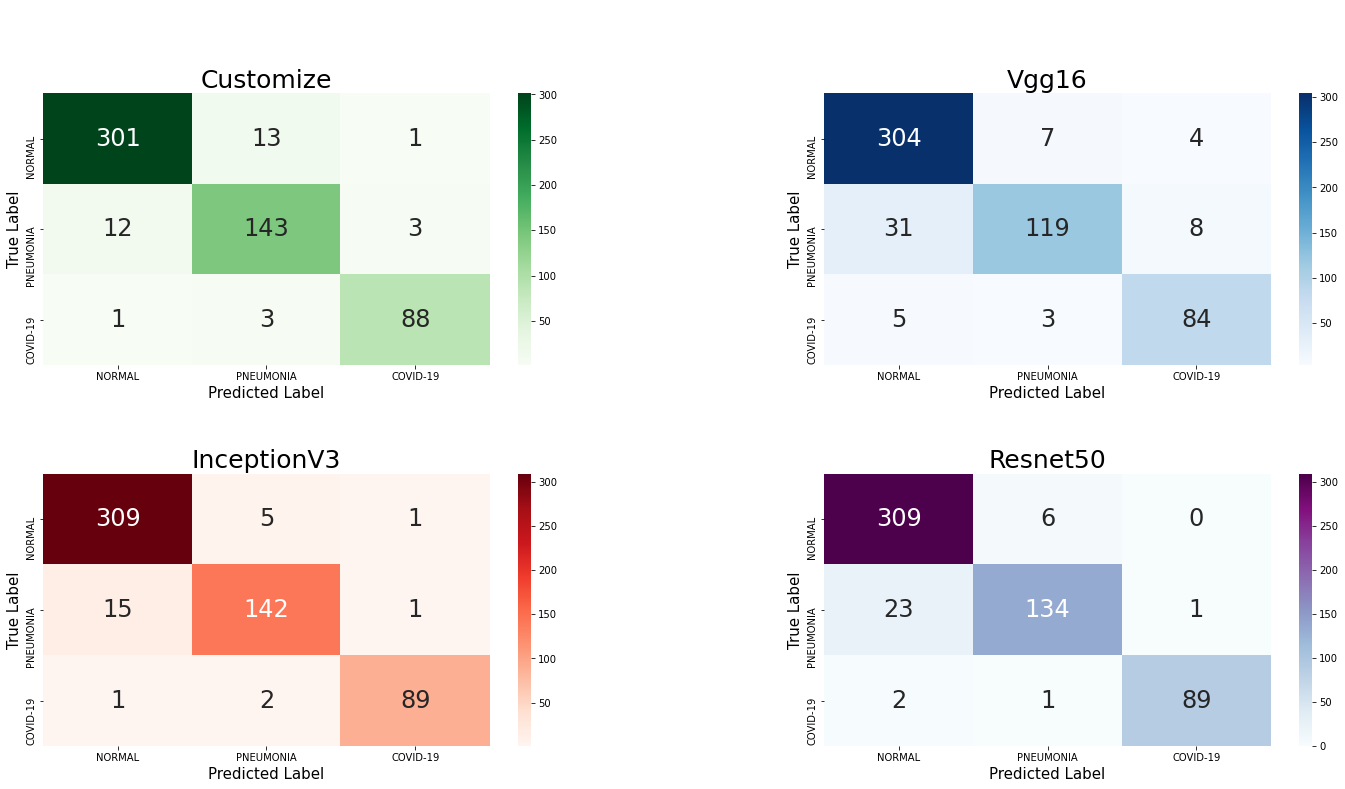

In [130]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24,color='white')
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


plt.subplot(2,2,1)
plt.title("Customize",size=25)
plt.gcf().axes[0].tick_params()
ax=sns.heatmap(cm_c,annot=True,cmap="Greens",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)


plt.subplot(2,2,2)
plt.title("Vgg16",size=25)
plt.gcf().axes[2].tick_params()
ax=sns.heatmap(cm_v,annot=True,cmap="Blues",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)




plt.subplot(2,2,3)
plt.title("InceptionV3",size=25)
plt.gcf().axes[4].tick_params()
ax=sns.heatmap(cm_i,annot=True,cmap="Reds",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)



plt.subplot(2,2,4)
plt.title("Resnet50",size=25)
plt.gcf().axes[6].tick_params()
ax=sns.heatmap(cm_r,annot=True,cmap="BuPu",fmt="d",xticklabels=result_3class,yticklabels=result_3class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)


In [131]:
cf = [cm_c,cm_v,cm_i,cm_r]
for i in range(len(cf)):
    if i == 0:
        cm_cs = np.array([[sum(sum(cf[i][:2]))-cf[i][0][2]-cf[i][1][2],cf[i][0][2]+cf[i][1][2]],
                     [sum(sum(cf[i][2:]))-cf[i][2][2],cf[i][2][2]]])
    if i == 1:
        cm_vs = np.array([[sum(sum(cf[i][:2]))-cf[i][0][2]-cf[i][1][2],cf[i][0][2]+cf[i][1][2]],
                     [sum(sum(cf[i][2:]))-cf[i][2][2],cf[i][2][2]]])
    if i == 2:
        cm_is = np.array([[sum(sum(cf[i][:2]))-cf[i][0][2]-cf[i][1][2],cf[i][0][2]+cf[i][1][2]],
                     [sum(sum(cf[i][2:]))-cf[i][2][2],cf[i][2][2]]])
    if i == 3:
        cm_rs = np.array([[sum(sum(cf[i][:2]))-cf[i][0][2]-cf[i][1][2],cf[i][0][2]+cf[i][1][2]],
                     [sum(sum(cf[i][2:]))-cf[i][2][2],cf[i][2][2]]])    

In [132]:
print(cm_cs)
print("")
print(cm_vs)
print("")
print(cm_is)
print("")
print(cm_rs)

[[469   4]
 [  4  88]]

[[461  12]
 [  8  84]]

[[471   2]
 [  3  89]]

[[472   1]
 [  3  89]]


Text(0.5, 114.0, 'Predicted Label')

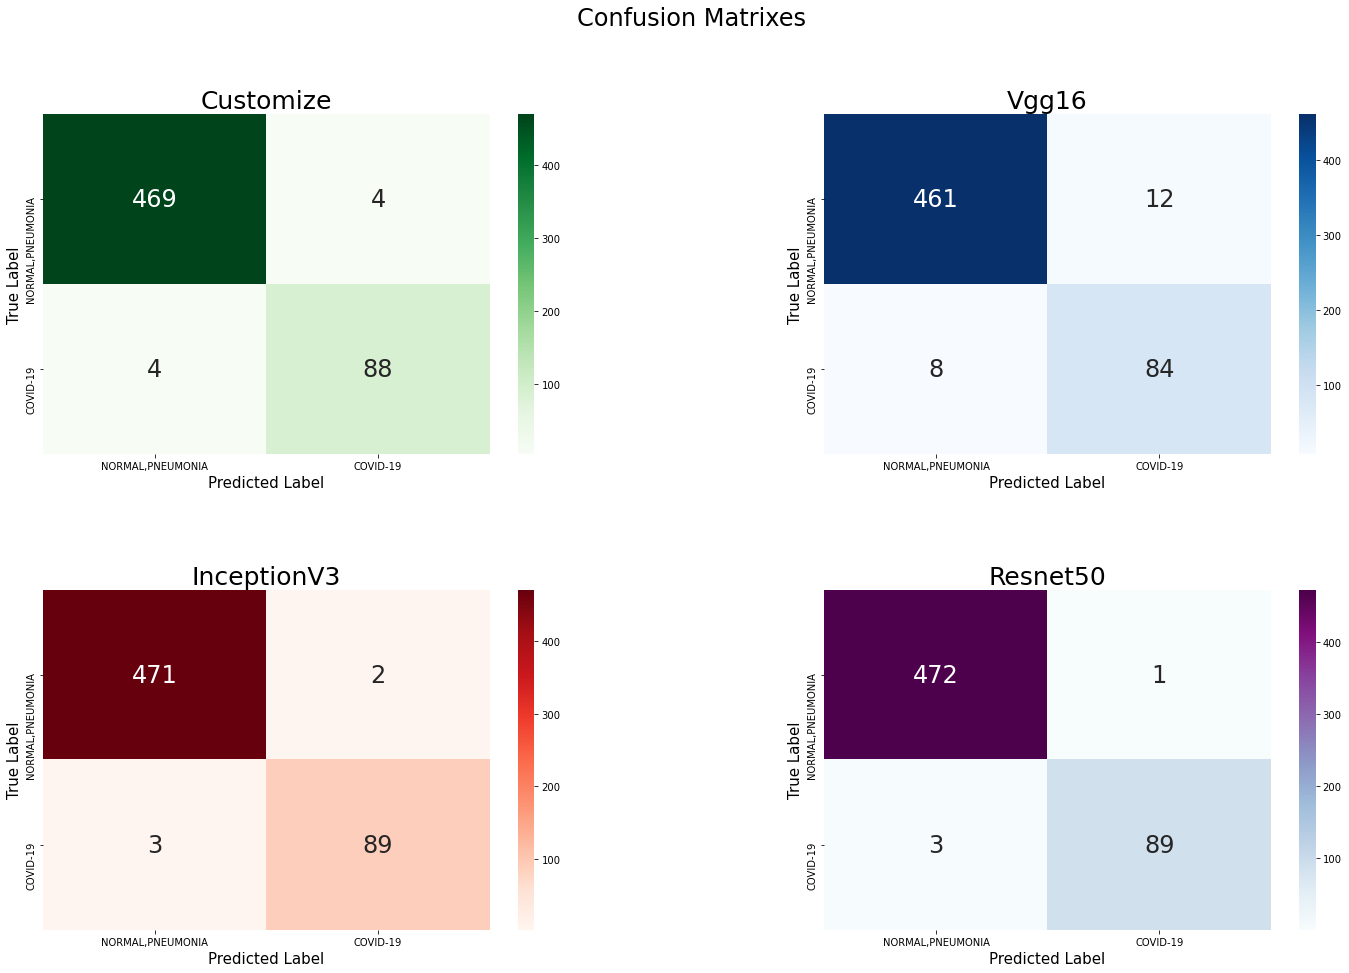

In [133]:
result_2class=['NORMAL,PNEUMONIA', 'COVID-19']

plt.figure(figsize=(24,15))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)


plt.subplot(2,2,1)
plt.title("Customize",size=25)
plt.gcf().axes[0].tick_params()
ax=sns.heatmap(cm_cs,annot=True,cmap="Greens",fmt="d",xticklabels=result_2class,yticklabels=result_2class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)


plt.subplot(2,2,2)
plt.title("Vgg16",size=25)
plt.gcf().axes[2].tick_params()
ax=sns.heatmap(cm_vs,annot=True,cmap="Blues",fmt="d",xticklabels=result_2class,yticklabels=result_2class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)




plt.subplot(2,2,3)
plt.title("InceptionV3",size=25)
plt.gcf().axes[4].tick_params()
ax=sns.heatmap(cm_is,annot=True,cmap="Reds",fmt="d",xticklabels=result_2class,yticklabels=result_2class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)



plt.subplot(2,2,4)
plt.title("Resnet50",size=25)
plt.gcf().axes[6].tick_params()
ax=sns.heatmap(cm_rs,annot=True,cmap="BuPu",fmt="d",xticklabels=result_2class,yticklabels=result_2class, annot_kws={"size": 24})
cbar = ax.collections[0].colorbar
cbar.ax.tick_params()
plt.ylabel("True Label",size=15)
plt.xlabel("Predicted Label",size=15)


In [134]:
cf = [cm_cs,cm_vs,cm_is,cm_rs]
model = ["Customize","Vgg16","InceptionV3","Resnet50"]
for i in range(len(cf)):
    TN = cf[i][1][1]
    FP = cf[i][1][0]
    TNR = TN/(TN+FP)
    print("{0} :Specificity (TNR) = {1:.4f}".format(model[i],TNR))

Customize :Specificity (TNR) = 0.9565
Vgg16 :Specificity (TNR) = 0.9130
InceptionV3 :Specificity (TNR) = 0.9674
Resnet50 :Specificity (TNR) = 0.9674


In [135]:
model_c.save('covid-19_cnn.model_c')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: covid-19_cnn.model_c\assets


In [136]:
model_v.save('covid-19_cnn.model_v')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: covid-19_cnn.model_v\assets


In [137]:
model_i.save('covid-19_cnn.model_i')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: covid-19_cnn.model_i\assets


In [138]:
model_r.save('covid-19_cnn.model_r')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
INFO:tensorflow:Assets written to: covid-19_cnn.model_r\assets
